<a href="https://colab.research.google.com/github/dimaakapout/MyProjects/blob/master/workshop/nlp/nlp_000_preprocessing_capitan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

# Задание

Скачать текст ["Капитанской дочки"](https://www.dropbox.com/s/aky2md6724r3yww/%D0%BA%D0%B0%D0%BF%D0%B8%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F%20%D0%B4%D0%BE%D1%87%D0%BA%D0%B0.txt?dl=0)

1. Найти длину текста в токенах, типах и леммах (после удаления пунктуации).
2. Проверить, соблюдается ли закон Ципфа и построить диаграмму с 20 самыми частотными словами (после удаления стоп-слов).
3. Найти среднюю длину предложения.
4. Найти самую частотную часть речи до удаления стоп-слов и после удаления. Постороить графики частотности частей речи. 

In [5]:
# Прочитаем файл
with open("капитанская дочка.txt", "r") as file:
    txt = file.read()
print(txt[:500])


РВБ

    XVIII в.
    XIX в.
    XX в.

    А. С. Пушкин Собр. соч. в 10 тт. Т. 5 Капитанская дочка 

КАПИТАНСКАЯ ДОЧКА
Береги честь смолоду.
Пословица.
Глава I
СЕРЖАНТ ГВАРДИИ
— Был бы гвардии он завтра ж капитан.
— Того не надобно; пусть в армии послужит.
— Изрядно сказано! пускай его потужит...
. . . . . . . . . . . . . . . . . . . . . . . . . . . .
Да кто его отец?
Княжнин.

Отец мой Андрей Петрович Гринев в молодости своей служил при графе Минихе и вышел в отставку премьер-майором в 17.. г


In [0]:
#!pip install pymorphy2

In [0]:
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import string
import numpy as np
from pymorphy2 import MorphAnalyzer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('snowball_data')
nltk.download('perluniprops')
nltk.download('universal_tagset')
nltk.download('stopwords')
nltk.download('nonbreaking_prefixes')
nltk.download('wordnet')

In [0]:
punct = string.punctuation  # Знаки препинания '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Удаление пунктуации в каждом токене
tokens = [word.strip(punct) for word in word_tokenize(txt)]

# Приводим все токены к нижнему регистру и выкидываем пустые строки
tokens = [word.lower() for word in tokens if word != '']

# Нормализация текста (лемматизация)
morph = MorphAnalyzer()
lemms = [morph.parse(word)[0].normal_form for word in tokens]

In [87]:
print('{0} токентов в тексте\n{1} словоформ в тексте\n{2} лемм в тексте.'.format(len(tokens), 
                                                                                 np.unique(np.array(tokens)).shape[0], 
                                                                                 np.unique(np.array(lemms)).shape[0]))

34635 токентов в тексте
9375 словоформ в тексте
5438 лемм в тексте.


In [0]:
# Удаляем стоп-слова 

from nltk.corpus import stopwords
sw = stopwords.words('russian')
cleaned_words = ([word for word in lemms if word not in sw])

In [0]:
import pandas as pd
from collections import Counter

In [0]:
count = Counter(cleaned_words)
count = pd.DataFrame(data=[count.keys(), count.values()], index=['word', 'counts']).T

In [57]:
count.head()

,word,counts
0,рвб,2
1,xviii,1
2,xix,1
3,xx,1
4,пушкин,3


In [79]:
#Видно что закрались лишние символы в нормализованные текст
count.sort_values('counts', ascending=False).head(10)

,word,counts
20,—,1073
154,»,317
138,«,316
28,сказать,253
633,иван,253
37,свой,194
62,весь,185
2732,пугачев,163
126,который,140
121,это,131


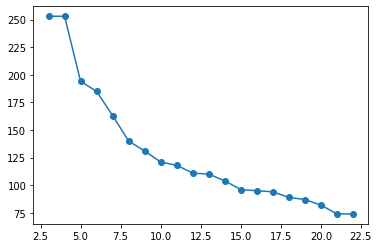

In [89]:
# Закон Ципфа выполняется
count.sort_values('counts', ascending=False).reset_index(drop=True)['counts'][3:23].plot(linestyle='-', marker='o')

In [0]:
sents = sent_tokenize(txt)

In [99]:
# средняя длина предложения
sum([len(sent) for sent in sents])/len(sents)

66.16850741558851